# Importing data from CSV files

In this notebook, we will look at importing data from CSV files. A good reference is the [Python documentation of the CSV library](https://docs.python.org/3/library/csv.html).

We'll just confine ourself here to importing and some basic plotting of data.

## Importing the CSV library.

To import Python's the csv libary module, we'll use:

In [1]:
import csv

# The 2018 Squirrel Census

Apparently was a [2018 squirrel census in Central Park](https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw). They even have data you can download from the 2018 census.

I've downloaded the file [2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv](https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD) and placed it in the same folder as this notebook.

It might be useful to open the CSV file in a spreadsheet program before analyzing it, just to get comfortable with the format. When you do this, you'll notice there is a header row followed by rows of data, one for each squirrel in the census.

Here we store off the filename:

In [2]:
filename = '2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv'

## Reading single rows

To open this file for reading we use the following (where `'r'` indicates that the file is being opened for reading):

In [3]:
f = open(filename, 'r')

Since this is a CSV file, we can then send the data from `f` to a CSV reader from the `csv` library:

In [4]:
reader = csv.reader(f)

To read the first row you use:

In [5]:
header_row = next(reader)

Here I display the `header_row`.

In [6]:
header_row

['X',
 'Y',
 'Unique Squirrel ID',
 'Hectare',
 'Shift',
 'Date',
 'Hectare Squirrel Number',
 'Age',
 'Primary Fur Color',
 'Highlight Fur Color',
 'Combination of Primary and Highlight Color',
 'Color notes',
 'Location',
 'Above Ground Sighter Measurement',
 'Specific Location',
 'Running',
 'Chasing',
 'Climbing',
 'Eating',
 'Foraging',
 'Other Activities',
 'Kuks',
 'Quaas',
 'Moans',
 'Tail flags',
 'Tail twitches',
 'Approaches',
 'Indifferent',
 'Runs from',
 'Other Interactions',
 'Lat/Long']

This is the first row in the data, the header information. It will be useful to know the index of each column. Here is a more useful presentation of the information in the header row.

In [7]:
for i in range(len(header_row)):
    print(f'{i}: {header_row[i]}')

0: X
1: Y
2: Unique Squirrel ID
3: Hectare
4: Shift
5: Date
6: Hectare Squirrel Number
7: Age
8: Primary Fur Color
9: Highlight Fur Color
10: Combination of Primary and Highlight Color
11: Color notes
12: Location
13: Above Ground Sighter Measurement
14: Specific Location
15: Running
16: Chasing
17: Climbing
18: Eating
19: Foraging
20: Other Activities
21: Kuks
22: Quaas
23: Moans
24: Tail flags
25: Tail twitches
26: Approaches
27: Indifferent
28: Runs from
29: Other Interactions
30: Lat/Long


Let's read the next row.

In [8]:
row = next(reader)
row

['-73.9561344937861',
 '40.7940823884086',
 '37F-PM-1014-03',
 '37F',
 'PM',
 '10142018',
 '3',
 '',
 '',
 '',
 '+',
 '',
 '',
 '',
 '',
 'false',
 'false',
 'false',
 'false',
 'false',
 '',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 '',
 'POINT (-73.9561344937861 40.7940823884086)']

You can see that the entries in this row are all strings. It might be more useful to print this data with the header.

In [9]:
for i in range(len(header_row)):
    print(f'{i}: {header_row[i]}: {row[i]}')

0: X: -73.9561344937861
1: Y: 40.7940823884086
2: Unique Squirrel ID: 37F-PM-1014-03
3: Hectare: 37F
4: Shift: PM
5: Date: 10142018
6: Hectare Squirrel Number: 3
7: Age: 
8: Primary Fur Color: 
9: Highlight Fur Color: 
10: Combination of Primary and Highlight Color: +
11: Color notes: 
12: Location: 
13: Above Ground Sighter Measurement: 
14: Specific Location: 
15: Running: false
16: Chasing: false
17: Climbing: false
18: Eating: false
19: Foraging: false
20: Other Activities: 
21: Kuks: false
22: Quaas: false
23: Moans: false
24: Tail flags: false
25: Tail twitches: false
26: Approaches: false
27: Indifferent: false
28: Runs from: false
29: Other Interactions: 
30: Lat/Long: POINT (-73.9561344937861 40.7940823884086)


You can see from this that the squirrel associated to this row (Squirrel `37F-PM-1014-03`) is nor running, chasing, climbing, eating, or foraging. He doesor she doesn't seem to be doing anything at all...

We can also see the first two entries in a row correspond to the latitude and longitude of the squirrel. (Compare the first two rows with the last.)

Once we are done reading from a file we should close it. We do this with:

In [10]:
f.close()

## Reading multiple rows

Maybe we are interested in counting the number of each color. From the above, the squirrel's primary color is in position `8` of each row. We'll keep track of the number of squirrels of each color using a dictionary, mapping colors to the number of squirrels. 

We'll loop through the rows, skipping the first, and update the dictionary as needed.

Initialize an empty dictionary:

In [11]:
squirrel_color_dictionary = {}

Open the CSV file for reading. 

In [12]:
filename = '2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv'
f = open(filename, 'r')
reader = csv.reader(f)

Store off the header row:

In [13]:
header_row = next(reader)

To iterate through the remaining rows, we'll use a for loop:
```python
for row in reader:
    # Do something
```
In the loop we can access the data for each row using the `row` variable. We'll want to access the color with `row[8]`. Then we either add that color to the dictionary (representing the first squirrel of that color) or increase the number that dictionary points to by one.

In [14]:
for row in reader:
    color = row[8]
    if color in squirrel_color_dictionary:
        # Increase the number of squirrels of this color by one.
        squirrel_color_dictionary[color] += 1
    else:
        # This is our first squirel of this color.
        squirrel_color_dictionary[color] = 1

Now let's look at the results.

In [15]:
squirrel_color_dictionary

{'': 55, 'Gray': 2473, 'Cinnamon': 392, 'Black': 103}

I'm guessing `''` represents an unidentified color. Here we print the percentages of each.

In [16]:
total = 0
for color in squirrel_color_dictionary:
    total += squirrel_color_dictionary[color]
print(f'There are a total of {total} squirrels in the census.')
for color in squirrel_color_dictionary:
    if color == '':
        fixed_color = "Unidentified color"
    else:
        fixed_color = color
    percentage = 100*squirrel_color_dictionary[color]/total
    print(f'{fixed_color} squirrels make up {percentage:.2f}% of the census.')

There are a total of 3023 squirrels in the census.
Unidentified color squirrels make up 1.82% of the census.
Gray squirrels make up 81.81% of the census.
Cinnamon squirrels make up 12.97% of the census.
Black squirrels make up 3.41% of the census.


In [17]:
f.close()

If we use numbers, we'll need to convert strings to numbers with `float(row[i])` or `int(row[i])`.

# Squirrel Map

Here we'll demonstrate how to plot squirrel positions.

In [18]:
f = open(filename, 'r')
reader = csv.reader(f)

In [19]:
header = next(reader)

In [20]:
import matplotlib.pyplot as plt

Below we load the latitude and longitude positions of squirrels into lists.

In [21]:
xs = []
ys = []
for row in reader:
    x = float(row[0])
    xs.append(x)
    y = float(row[1])
    ys.append(y)

Now we plot this data.

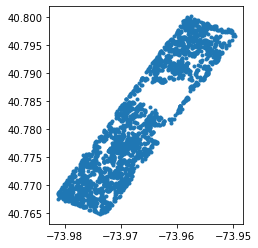

In [23]:
plt.axes().set_aspect('equal')
plt.plot(xs, ys, '.')
plt.show()